## Decision Tree Classifier

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as nnp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import plot_tree

In [2]:
# Load the Dataset
df = pd.read_csv('Renewable_Energy_Adoption.csv')
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [3]:
# Feature Selection
X = df.drop('adoption',axis = 1)
y= df['adoption']

In [4]:
X

,carbon_emissions,energy_output,renewability_index,cost_efficiency
0,181.089042,128.286267,0.642032,0.732568
1,382.750007,672.769370,0.084140,2.891096
2,306.197880,382.920383,0.161629,2.932858
3,259.530469,557.713622,0.898554,3.368435
4,104.606524,916.809827,0.606429,3.767411
...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408
96,232.956490,753.360111,0.769994,4.362857
97,199.639356,907.399234,0.215821,2.430473
98,58.896694,898.377782,0.622890,3.878920


In [5]:
y

0     1
1     0
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: adoption, Length: 100, dtype: int64

In [6]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=41)

In [7]:
# Initialise the model with a specified max depth to prevent overfitting.
model= DecisionTreeClassifier(max_depth=3,random_state=42)
#Train the model
model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [9]:
# Mertics
# Accuracy Score
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy Score is {acc}")

Accuracy Score is 0.8


In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  2],
       [ 2,  4]])

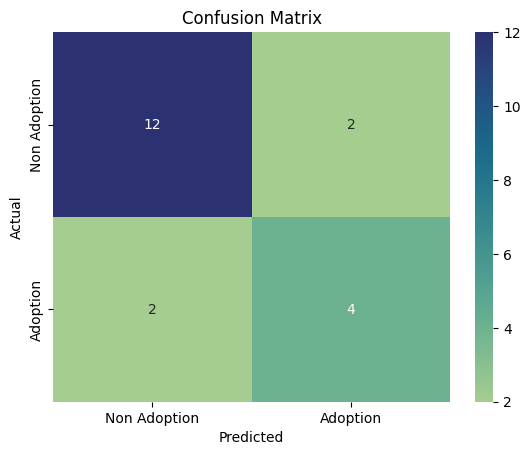

In [11]:
sns.heatmap(cm,annot=True,fmt='d',cmap='crest',
            xticklabels=['Non Adoption','Adoption'],
            yticklabels=['Non Adoption','Adoption'],)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Classification Report
print(classification_report(y_test,y_pred,target_names=['Non Adoption','Adoption']))

              precision    recall  f1-score   support

Non Adoption       0.86      0.86      0.86        14
    Adoption       0.67      0.67      0.67         6

    accuracy                           0.80        20
   macro avg       0.76      0.76      0.76        20
weighted avg       0.80      0.80      0.80        20



In [13]:
import joblib
joblib.dump(model,'DTC_REAdoption.pkl')

['DTC_REAdoption.pkl']

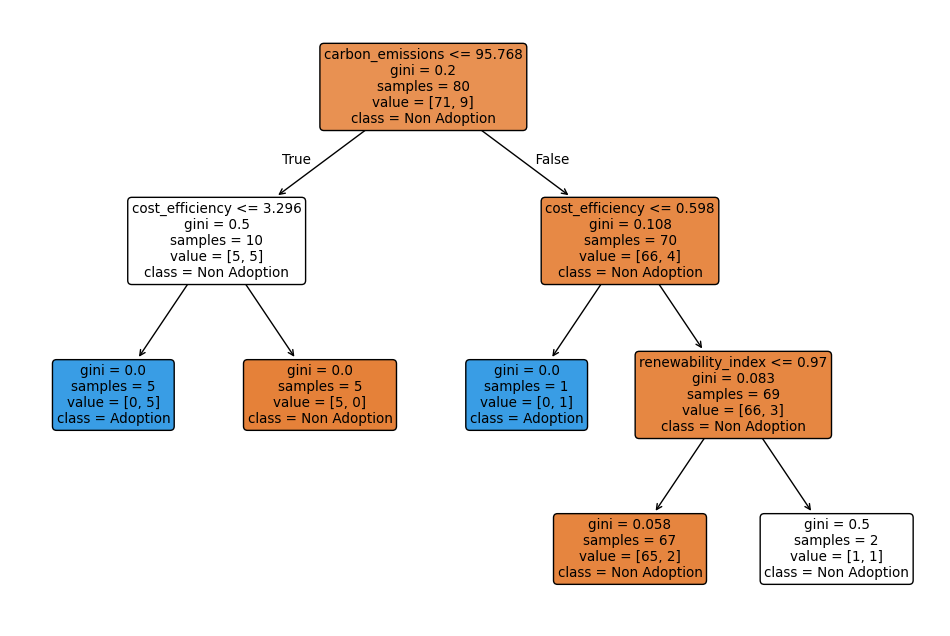

In [14]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Non Adoption','Adoption'],
          filled=True,rounded=True)
plt.savefig('dtc_rea.png')
plt.show()